In [92]:
import re
from collections import Counter

# get input data
print("TRAIN + DEV")
train_lines = open("data/train/in.tsv", "r").readlines()
dev_lines = open("data/dev-0/in.tsv", "r").readlines()
lines = train_lines + dev_lines

lines = [line.split("\t") for line in lines]

sources = list(zip(*lines))[0]
texts_ts = list(zip(*lines))[2]

texts = [re.sub(r':\d+-\d+', '', text) for text in texts_ts]
texts = [text.replace("\n", "") for text in texts]

print(len(texts), "sentences\n", len(set(sources)), "audio files")

TRAIN + DEV
11010 sentences
 69 audio files


In [96]:
# get labels
train_labels = open("data/train/expected.tsv", "r").readlines()
dev_labels = open("data/dev-0/expected.tsv", "r").readlines()
labels = train_labels + dev_labels
labels = [label.replace("\n", "") for label in labels]

len(labels)
list(zip(texts, labels))[:5]

[('I teraz mamy drugi dzień takiej ładnej pogody Ała Nie bij mnie kijem To boli',
  'I teraz mamy drugi dzień takiej ładnej pogody... Ała! Nie bij mnie kijem! To boli!'),
 ('Stasio Bo nie dostaniesz jogurciku',
  'Stasio! Bo nie dostaniesz jogurciku!'),
 ('Jogurcik dostają tylko grzeczne dzieci Które nie biją mamy kijem',
  'Jogurcik dostają tylko grzeczne dzieci. Które nie biją mamy kijem.'),
 ('Nie biją', 'Nie biją.'),
 ('Uhm A co powiesz jak wejdziesz do sklepu',
  'Uhm. A co powiesz, jak wejdziesz do sklepu?')]

In [236]:
# number of words
lengths = [len(text.split()) for text in texts]
print("min: ", min(lengths), "\nmax: ", max(lengths), "\navg: ", sum(lengths) / len(lengths), "\nall: ", sum(lengths))

min:  1 
max:  184 
avg:  8.909627611262488 
all:  98095


In [229]:
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
%matplotlib inline

def punctuation_stats(labels):  
    labels = [label.replace("...", '…') for label in labels]
    puncts = [re.sub(r'\w|\s', '', label) for label in labels]
    puncts_number = Counter("".join(puncts)).most_common()
    print("total punctuation count:")
    pprint(puncts_number)

    counts = np.zeros((len(puncts_number), len(labels)))
    for i, label in enumerate(labels):
        for j, punct in enumerate(puncts_number):
            counts[j, i] = label.count(punct[0])

    plt.figure(figsize=(10,50))
    plt.imshow(counts[:, :50], cmap='gray')
    plt.yticks(range(len(puncts_number)), [punct[0] for punct in puncts_number]);

    stats = [["", "min", "max", "mean", "std"]] + list(zip([punct[0] for punct in puncts_number], counts.min(axis=1), counts.max(axis=1), counts.mean(axis=1), counts.std(axis=1)))
    print("stats for sentences")
    pprint(stats)

total punctuation count:
[(',', 11141),
 ('.', 7785),
 ('…', 4519),
 ('?', 1659),
 ('!', 247),
 ('-', 166),
 ('@', 1)]
stats for sentences
[['', 'min', 'max', 'mean', 'std'],
 (',', 0.0, 19.0, 1.0118982742960945, 1.6335893326434152),
 ('.', 0.0, 10.0, 0.7070844686648501, 0.7885619311731719),
 ('…', 0.0, 11.0, 0.41044504995458675, 0.9531342636514238),
 ('?', 0.0, 4.0, 0.15068119891008175, 0.40713659634611926),
 ('!', 0.0, 3.0, 0.022434150772025433, 0.18018528277052606),
 ('-', 0.0, 3.0, 0.015077202543142598, 0.13256951439506232),
 ('@', 0.0, 1.0, 9.082652134423252e-05, 0.009529862112709345)]


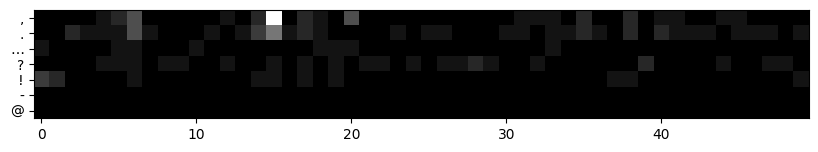

In [230]:
punctuation_stats(labels) # In gold labels

total punctuation count:
[('-', 115), ('…', 49), ("'", 15), ('@', 1), ('.', 1)]
stats for sentences
[['', 'min', 'max', 'mean', 'std'],
 ('-', 0.0, 3.0, 0.01044504995458674, 0.10941128036098066),
 ('…', 0.0, 2.0, 0.004450499545867393, 0.07053829972238501),
 ("'", 0.0, 1.0, 0.0013623978201634877, 0.03688552144599695),
 ('@', 0.0, 1.0, 9.082652134423252e-05, 0.009529862112709345),
 ('.', 0.0, 1.0, 9.082652134423252e-05, 0.009529862112709345)]


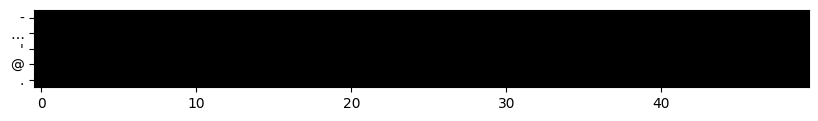

In [237]:
punctuation_stats(texts) # In raw text

In [233]:
# Add duration for each word

import re
times = []
matches = re.findall(r':\d+-\d+', texts_ts[0])
for match in matches:
    match = match[1:].split("-")
    times.append(int(match[1]) - int(match[0]))

text_dur = list(zip(texts[0].split(" "), times))
text_dur = [str(x) for t in text_dur for x in t]
" ".join(text_dur)

'I 0 teraz 240 mamy 120 drugi 420 dzień 120 takiej 240 ładnej 210 pogody 570 Ała 0 Nie 60 bij 120 mnie 210 kijem 420 To 60 boli 90'